In [613]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [614]:
train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('Test.csv')

In [615]:
train_data.head()

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status
0,ADF0039,123.0,4.10,76.7140,0.00,1.25,1.4951,14.0,564.0,6408.0,2.0,2G,2G,Uxaa,Mango,0.0
1,ADF0041,1316.0,43.87,98.8904,4.14,1.25,1.0244,27.0,1626.0,4373.0,1.0,2G,2G,Uxaa,Mango,0.0
2,ADF0051,2385.0,79.50,372.6300,3.51,1.25,6.0898,119.0,10411.0,22039.0,1.0,2G,2G,Weematel,Mango,0.0
3,ADF0059,1614.0,53.80,530.2000,6.85,1.25,3.3447,69.0,6822.0,6274.0,1.0,2G,2G,0,Mango,0.0
4,ADF0060,2175.0,72.50,554.1300,6.99,153.75,673204.0342,33.0,3387.0,7241.0,1.0,2G,3G,Weematel,Mango,0.0


In [616]:
#train_data.info()

<h3>Checking for missing data and removing NAN values</h3>

In [617]:
null_data = train_data.isnull()

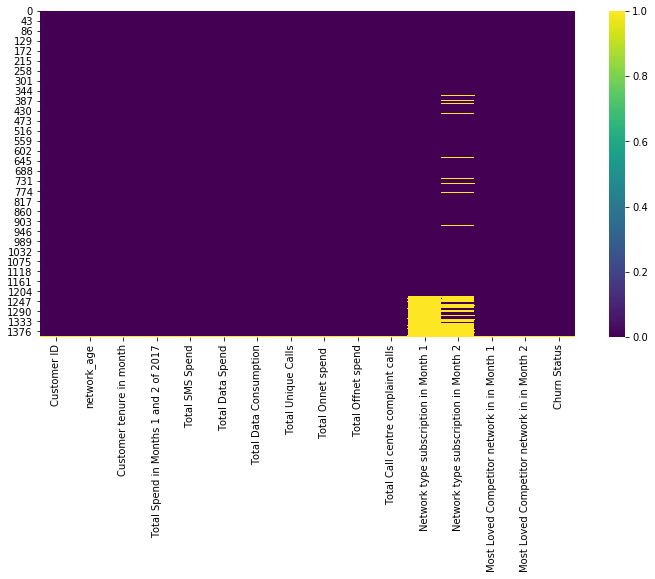

In [618]:
plt.figure(figsize=(12,6))
sns.heatmap(null_data, cmap='viridis')

In [619]:
train_data['Network type subscription in Month 1'].fillna('2G', inplace = True)

In [620]:
train_data['Network type subscription in Month 2'].fillna('3G', inplace = True)

In [621]:
train_data.dropna(inplace = True)

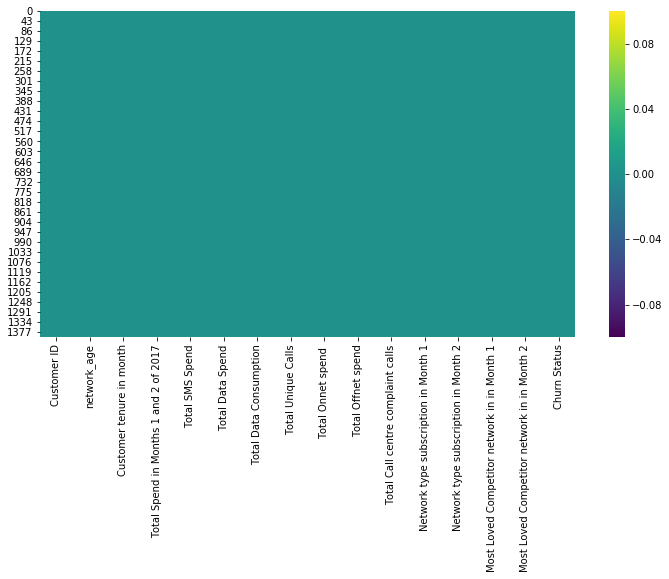

In [622]:
plt.figure(figsize=(12,6))
sns.heatmap(train_data.isnull(), cmap='viridis')

In [623]:
train_data.drop(['Customer tenure in month', 'Most Loved Competitor network in in Month 1', 'Most Loved Competitor network in in Month 2', 'Network type subscription in Month 1', 'Network type subscription in Month 2', 'Customer ID'], axis = 1, inplace = True)

In [624]:
#train_data = train_data.iloc[:600]


In [625]:
#corr_matrix = train_data.corr()
#f, ax = plt.subplots(figsize = (18, 10))
#sns.heatmap(corr_matrix, linewidths = 2.0, annot = True)
#ax.set_title('Correlation matrix')

<h3> Prepare the test data </h3>

In [626]:
test_data.drop(['Customer tenure in month', 'Most Loved Competitor network in in Month 1', 'Most Loved Competitor network in in Month 2', 'Network type subscription in Month 1', 'Network type subscription in Month 2', 'Customer ID'], axis = 1, inplace = True)

In [627]:
test_data.head()

,network_age,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls
0,1012,1560.1156,14.04,226.3,3.126093e+06,64,14503,12402,1
1,137,1705.8368,73.63,5.0,1.628809e+02,515,29832,88953,9
2,202,1720.3008,4.36,245.0,3.334607e+06,163,228,1495,1
3,165,1732.2800,0.00,12.5,6.682924e+05,484,0,71928,2
4,759,1873.0600,69.57,412.5,6.666975e+06,64,7616,20753,2


In [628]:
#test_data.info()

In [634]:
y = train_data['Churn Status']
x = train_data.drop(['Churn Status'], axis = 1, inplace = True)


<h3>Building the model </h3>

In [640]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x = train_data.as_matrix().astype(np.float)
x = scaler.fit_transform(x)


In [641]:
from sklearn.model_selection import train_test_split

In [642]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

In [643]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 300)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [644]:
rfc_predictions = rfc.predict(test_data)

In [655]:
#rfc_predictions

In [646]:
from sklearn.metrics import classification_report,confusion_matrix

In [647]:
#rfc_predictions

In [657]:
print(classification_report(y_test, rfc_predictions))

ValueError: Found input variables with inconsistent numbers of samples: [420, 600]

In [650]:
rfc_predictions = np.asarray(rfc_predictions, dtype = int)

In [651]:
train_data = pd.read_csv('Test.csv')
customer_id = train_data['Customer ID']

In [652]:
submision = pd.DataFrame(rfc_predictions, columns = ['Churn Status'], index = customer_id )

In [1]:
#submision.to_csv('final output1.csv')

<h3> predicting with a Decission Tree</h3>

In [565]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [566]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [567]:
dtree_predictions = dtree.predict(test_data)

In [570]:
print(classification_report(y, dtree_predictions))

             precision    recall  f1-score   support

        0.0       0.52      0.96      0.67       316
        1.0       0.18      0.01      0.02       284

avg / total       0.36      0.51      0.36       600

